# IMDB
This notebook contains the first few steps of the data science pipeline on a dataset containing movies.

## Group
V2H-Groep 1: Films (IMDB)
- Niels Hoiting
- Jari Oostrom
- Yusuf Syakur

## Research questions
1. What is the correlation between the gender of actors and the popularity of the movie. How does this change overtime?
2. How can we predict a movie's genre with variables like budget, release year, actors, directors, gross, color, and any other variable?
3. To what extend can you predict the gross of a movie based on its popularity on Facebook and IMDB.
4. How accurately can we predict release years from other variables like director, gross, budget, color and any other variable?

bonus. What happens if you cluster keywords from the plot?

## Dataset
movie information with duration, genres, languages, country, budget and gross;
likes on facebook for director, main cast, total cast en the movie itself;
score on IMDB and reviews

## Step 1: Data collection
Import needed libraries. The dataset is already available.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import json

In [2]:
df_movies = pd.read_csv('movie.csv')
df_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


## Step 2: Data processing (Data munging)
Look at the current dataframe and their types.

In [3]:
df_movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Current column order does not make sense. Order them.

In [5]:
df_movies = df_movies[['movie_imdb_link', 'movie_title', 'imdb_score', 'title_year', 'director_name', 'director_facebook_likes', 'actor_1_name',
                      'actor_1_facebook_likes', 'actor_2_name', 'actor_2_facebook_likes', 'actor_3_name', 'actor_3_facebook_likes',
                      'cast_total_facebook_likes', 'movie_facebook_likes', 'genres', 'budget', 'gross', 'country', 'language',
                      'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 'plot_keywords', 'color', 'content_rating',
                      'duration', 'aspect_ratio', 'facenumber_in_poster']]
df_movies

,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,language,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,color,content_rating,duration,aspect_ratio,facenumber_in_poster
0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,7.9,2009.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,English,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,Color,PG-13,178.0,1.78,0.0
1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,7.1,2007.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,English,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,Color,PG-13,169.0,2.35,0.0
2,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Spectre,6.8,2015.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,English,602.0,994.0,275868,bomb|espionage|sequel|spy|terrorist,Color,PG-13,148.0,2.35,1.0
3,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight Rises,8.5,2012.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,English,813.0,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,Color,PG-13,164.0,2.35,0.0
4,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Star Wars: Episode VII - The Force Awakens ...,7.1,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,...,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,Signed Sealed Delivered,7.7,2013.0,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,English,1.0,6.0,629,fraud|postal worker|prison|theft|trial,Color,NaN,87.0,NaN,2.0
5039,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,The Following,7.5,NaN,NaN,NaN,Natalie Zea,841.0,Valorie Curry,593.0,...,English,43.0,359.0,73839,cult|fbi|hideout|prison escape|serial killer,Color,TV-14,43.0,16.00,1.0
5040,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,A Plague So Pleasant,6.3,2013.0,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,English,13.0,3.0,38,NaN,Color,NaN,76.0,NaN,0.0
5041,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,Shanghai Calling,6.3,2012.0,Daniel Hsia,0.0,Alan Ruck,946.0,Daniel Henney,719.0,...,English,14.0,9.0,1255,NaN,Color,PG-13,100.0,2.35,5.0


## Step 3: Data Cleaning

Drop overall duplicates first.

In [6]:
print('Before removing duplicates', df_movies.shape)
df_movies = df_movies.drop_duplicates()
print('After removing duplicates:', df_movies.shape)

Before removing duplicates (5043, 28)
After removing duplicates: (4998, 28)


### 3.1 movie_imdb_link

The movie_imdb_link duplicates only differ on a few columns like likes and votes. Extract the unique identifier from the URL and remove these duplicate rows.

In [7]:
pd.concat(gby_result for _, gby_result in df_movies.groupby("movie_imdb_link") if len(gby_result) > 1)

,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,language,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,color,content_rating,duration,aspect_ratio,facenumber_in_poster
3711,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,"20,000 Leagues Under the Sea",7.2,1954.0,Richard Fleischer,130.0,James Mason,617.0,Robert J. Wilke,53.0,...,English,69.0,108.0,22123,captain|expedition|sea|submarine|whale,Color,Approved,127.0,1.37,0.0
4894,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,"20,000 Leagues Under the Sea",7.2,1954.0,Richard Fleischer,130.0,James Mason,618.0,Robert J. Wilke,53.0,...,English,69.0,108.0,22124,captain|expedition|sea|submarine|whale,Color,Approved,127.0,1.37,0.0
890,http://www.imdb.com/title/tt0056193/?ref_=fn_t...,Lolita,7.7,1962.0,Stanley Kubrick,0.0,James Mason,617.0,Shelley Winters,367.0,...,English,103.0,207.0,67822,lolita|nymphet|older man young girl relationsh...,Black and White,Not Rated,152.0,1.66,0.0
4256,http://www.imdb.com/title/tt0056193/?ref_=fn_t...,Lolita,7.7,1962.0,Stanley Kubrick,0.0,James Mason,618.0,Shelley Winters,367.0,...,English,103.0,207.0,67825,lolita|nymphet|older man young girl relationsh...,Black and White,Not Rated,152.0,1.66,0.0
3278,http://www.imdb.com/title/tt0072271/?ref_=fn_t...,The Texas Chain Saw Massacre,7.5,1974.0,Tobe Hooper,365.0,Gunnar Hansen,383.0,Edwin Neal,371.0,...,English,277.0,826.0,96410,cannibal|chainsaw|hitchhiker|independent film|...,Color,R,88.0,1.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,http://www.imdb.com/title/tt3276924/?ref_=fn_t...,Heist,6.1,2015.0,Scott Mann,8.0,Robert De Niro,22000.0,Joshua Mikel,1000.0,...,English,44.0,57.0,16198,bus|die hard scenario,Color,R,93.0,2.35,1.0
145,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,Pan,5.8,2015.0,Joe Wright,456.0,Hugh Jackman,20000.0,Cara Delevingne,548.0,...,English,256.0,186.0,39956,1940s|child hero|fantasy world|orphan|referenc...,Color,PG,111.0,2.35,4.0
3879,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,Pan,5.8,2015.0,Joe Wright,456.0,Hugh Jackman,20000.0,Cara Delevingne,559.0,...,English,256.0,186.0,39975,1940s|child hero|fantasy world|orphan|referenc...,Color,PG,111.0,2.35,4.0
3158,http://www.imdb.com/title/tt4178092/?ref_=fn_t...,The Gift,7.1,2015.0,Joel Edgerton,0.0,Busy Philipps,1000.0,Allison Tolman,562.0,...,English,297.0,279.0,79909,compulsive liar|fired from a job|gift|rape|sub...,Color,R,108.0,2.35,1.0


In [8]:
df_movies['movie_imdb_link'] = df_movies['movie_imdb_link'].str.extract(r'(?<=title\/)(.*)(?=\/\?)', expand=False)
print('Length before removing duplicates', df_movies.shape)
df_movies = df_movies.drop_duplicates(subset='movie_imdb_link')
print('Length after removing duplicates:',df_movies.shape)

Length before removing duplicates (4998, 28)
Length after removing duplicates: (4919, 28)


/opt/anaconda/envs/TCIF-V2DS-16/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 3.2 movie_title

Strip whitespaces from both ends for the title. Duplicate movie_title rows might be a remake or a reboot of the movie. Leave them.

In [9]:
df_movies['movie_title'] = df_movies['movie_title'].str.strip()

### 3.3 title_year
Rows that have NaN for title_year are series/reviews, not movies. We won't need these for our analysis. CHange title_year to DateTime64 for time series analysis.

In [10]:
df_movies.loc[df_movies['title_year'].isnull()]

,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,language,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,color,content_rating,duration,aspect_ratio,facenumber_in_poster
4,tt5289954,Star Wars: Episode VII - The Force Awakens,7.1,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,...,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,0.0
177,tt0086759,Miami Vice,7.5,NaN,NaN,NaN,Don Johnson,982.0,Philip Michael Thomas,321.0,...,English,21.0,74.0,16769,cult tv|detective|drugs|police|undercover,Color,TV-14,60.0,1.33,2.0
260,tt0084967,The A-Team,7.6,NaN,NaN,NaN,George Peppard,669.0,Dirk Benedict,554.0,...,English,29.0,97.0,25402,1980s|cult tv|famous opening theme|good versus...,Color,TV-PG,60.0,4.00,4.0
279,tt1869849,"10,000 B.C.",7.2,NaN,Christopher Barnard,0.0,Mathew Buck,5.0,NaN,NaN,...,NaN,NaN,NaN,6,NaN,NaN,NaN,22.0,NaN,0.0
404,tt2243973,Hannibal,8.6,NaN,NaN,NaN,Caroline Dhavernas,544.0,Scott Thompson,183.0,...,English,103.0,270.0,159910,blood|cannibalism|fbi|manipulation|psychiatrist,Color,TV-14,44.0,1.78,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,tt0813715,Heroes,7.7,NaN,NaN,NaN,Sendhil Ramamurthy,1000.0,Masi Oka,923.0,...,English,75.0,379.0,202115,father daughter relationship|serial killer|sup...,Color,TV-14,60.0,16.00,4.0
4803,tt0197159,Home Movies,8.2,NaN,NaN,NaN,Brendon Small,59.0,Ron Lynch,11.0,...,English,11.0,82.0,7458,coach|friend|school|series|tv series,Color,TV-PG,22.0,1.33,0.0
4819,tt2070791,Revolution,6.7,NaN,NaN,NaN,Billy Burke,2000.0,Tracy Spiridakos,821.0,...,English,23.0,323.0,72017,2020s|near future|one word series title|post a...,Color,TV-14,43.0,16.00,6.0
4869,tt3428912,Happy Valley,8.5,NaN,NaN,NaN,Shirley Henderson,887.0,James Norton,340.0,...,English,11.0,59.0,12848,caravan|police|police sergeant|tied to a chair...,Color,TV-MA,58.0,16.00,1.0


In [11]:
print('Length before removing NaN for title_year:', df_movies.shape)
df_movies = df_movies.drop(df_movies.loc[df_movies['title_year'].isnull()].index)
print('Length after removing NaN for title_year:', df_movies.shape)
df_movies['title_year'] = pd.to_datetime(df_movies['title_year'], format='%Y', errors='coerce')
df_movies

Length before removing NaN for title_year: (4919, 28)
Length after removing NaN for title_year: (4813, 28)


,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,language,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,color,content_rating,duration,aspect_ratio,facenumber_in_poster
0,tt0499549,Avatar,7.9,2009-01-01,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,English,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,Color,PG-13,178.0,1.78,0.0
1,tt0449088,Pirates of the Caribbean: At World's End,7.1,2007-01-01,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,English,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,Color,PG-13,169.0,2.35,0.0
2,tt2379713,Spectre,6.8,2015-01-01,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,English,602.0,994.0,275868,bomb|espionage|sequel|spy|terrorist,Color,PG-13,148.0,2.35,1.0
3,tt1345836,The Dark Knight Rises,8.5,2012-01-01,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,English,813.0,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,Color,PG-13,164.0,2.35,0.0
5,tt0401729,John Carter,6.6,2012-01-01,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,...,English,462.0,738.0,212204,alien|american civil war|male nipple|mars|prin...,Color,PG-13,132.0,2.35,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,tt1880418,Newlyweds,6.4,2011-01-01,Edward Burns,0.0,Kerry Bishé,296.0,Caitlin FitzGerald,205.0,...,English,14.0,14.0,1338,written and directed by cast member,Color,Not Rated,95.0,NaN,1.0
5038,tt3000844,Signed Sealed Delivered,7.7,2013-01-01,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,English,1.0,6.0,629,fraud|postal worker|prison|theft|trial,Color,NaN,87.0,NaN,2.0
5040,tt2107644,A Plague So Pleasant,6.3,2013-01-01,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,English,13.0,3.0,38,NaN,Color,NaN,76.0,NaN,0.0
5041,tt2070597,Shanghai Calling,6.3,2012-01-01,Daniel Hsia,0.0,Alan Ruck,946.0,Daniel Henney,719.0,...,English,14.0,9.0,1255,NaN,Color,PG-13,100.0,2.35,5.0


### 3.4 actor_1_name
Rows that have NaN for actor_1_name are documentaries, not movies. Remove them.

In [12]:
df_movies.loc[df_movies['actor_1_name'].isnull()]


,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,language,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,color,content_rating,duration,aspect_ratio,facenumber_in_poster
4502,tt2035599,"Pink Ribbons, Inc.",7.4,2011-01-01,Léa Pool,4.0,NaN,NaN,NaN,NaN,...,English,23.0,10.0,591,breast cancer|comma in title|period in title|p...,Color,Not Rated,97.0,NaN,0.0
4519,tt0304692,Sex with Strangers,4.7,2002-01-01,Harry Gantz,0.0,NaN,NaN,NaN,NaN,...,English,12.0,8.0,285,bisexual|explicit sex|sex|stranger|swing,Color,NaN,105.0,1.33,0.0
4720,tt1981703,The Harvest/La Cosecha,7.2,2011-01-01,U. Roberto Romano,6.0,NaN,NaN,NaN,NaN,...,English,3.0,2.0,57,child labor|education|hispanic|labor|migration,Color,NaN,80.0,NaN,0.0
4837,tt0221809,Ayurveda: Art of Being,7.6,2001-01-01,Pan Nalin,95.0,NaN,NaN,NaN,NaN,...,English,15.0,12.0,341,eastern philosophy|healing|india|life,Color,NaN,102.0,1.85,0.0
4945,tt2638024,The Brain That Sings,8.2,2013-01-01,Amal Al-Agroobi,58.0,NaN,NaN,NaN,NaN,...,Arabic,NaN,NaN,18,autism|middle east|music therapy|united arab e...,Color,NaN,62.0,NaN,1.0
4946,tt0488873,The Blood of My Brother,6.6,2005-01-01,Andrew Berends,0.0,NaN,NaN,NaN,NaN,...,English,12.0,7.0,102,american|blood|dream|patrol|tank,Color,NaN,90.0,1.66,1.0
4990,tt4462082,Counting,6.0,2015-01-01,Jem Cohen,6.0,NaN,NaN,NaN,NaN,...,English,12.0,1.0,61,city|city symphony|diary|essay|surveillance,Color,NaN,111.0,1.78,0.0


In [13]:
print('Length before removing NaN for actor_1_name:', df_movies.shape)
df_movies = df_movies.drop(df_movies.loc[df_movies['actor_1_name'].isnull()].index)
print('Length after removing NaN for actor_1_name:', df_movies.shape)
df_movies

Length before removing NaN for actor_1_name: (4813, 28)
Length after removing NaN for actor_1_name: (4806, 28)


,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,language,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,color,content_rating,duration,aspect_ratio,facenumber_in_poster
0,tt0499549,Avatar,7.9,2009-01-01,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,English,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,Color,PG-13,178.0,1.78,0.0
1,tt0449088,Pirates of the Caribbean: At World's End,7.1,2007-01-01,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,English,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,Color,PG-13,169.0,2.35,0.0
2,tt2379713,Spectre,6.8,2015-01-01,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,English,602.0,994.0,275868,bomb|espionage|sequel|spy|terrorist,Color,PG-13,148.0,2.35,1.0
3,tt1345836,The Dark Knight Rises,8.5,2012-01-01,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,English,813.0,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,Color,PG-13,164.0,2.35,0.0
5,tt0401729,John Carter,6.6,2012-01-01,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,...,English,462.0,738.0,212204,alien|american civil war|male nipple|mars|prin...,Color,PG-13,132.0,2.35,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,tt1880418,Newlyweds,6.4,2011-01-01,Edward Burns,0.0,Kerry Bishé,296.0,Caitlin FitzGerald,205.0,...,English,14.0,14.0,1338,written and directed by cast member,Color,Not Rated,95.0,NaN,1.0
5038,tt3000844,Signed Sealed Delivered,7.7,2013-01-01,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,English,1.0,6.0,629,fraud|postal worker|prison|theft|trial,Color,NaN,87.0,NaN,2.0
5040,tt2107644,A Plague So Pleasant,6.3,2013-01-01,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,English,13.0,3.0,38,NaN,Color,NaN,76.0,NaN,0.0
5041,tt2070597,Shanghai Calling,6.3,2012-01-01,Daniel Hsia,0.0,Alan Ruck,946.0,Daniel Henney,719.0,...,English,14.0,9.0,1255,NaN,Color,PG-13,100.0,2.35,5.0


### 3.5 genres

Genres are split with an '|' delimeter. In total there are 28 unique genres. There are no NaN values. Split them and give them an own boolean column.

In [14]:
list_genres = list(set(itertools.chain.from_iterable(df_movies.genres.str.split('|'))))
print(list_genres)

def add_genre(df, genre):
    genreConcat = 'genre_' + genre
    df_copy = df.copy()
    df_copy[genreConcat] = df_copy['genres'].str.contains(pat = genre)
    return df_copy

for genre in list_genres:
    df_movies = add_genre(df_movies, genre)

df_movies

['Thriller', 'Western', 'Documentary', 'Fantasy', 'Animation', 'Horror', 'Crime', 'Adventure', 'Drama', 'Action', 'Biography', 'Sport', 'War', 'News', 'Romance', 'Short', 'Mystery', 'Music', 'Sci-Fi', 'History', 'Family', 'Musical', 'Comedy', 'Film-Noir']


,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,genre_Romance,genre_Short,genre_Mystery,genre_Music,genre_Sci-Fi,genre_History,genre_Family,genre_Musical,genre_Comedy,genre_Film-Noir
0,tt0499549,Avatar,7.9,2009-01-01,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,False,False,False,False,True,False,False,False,False,False
1,tt0449088,Pirates of the Caribbean: At World's End,7.1,2007-01-01,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,False,False,False,False,False,False,False,False,False,False
2,tt2379713,Spectre,6.8,2015-01-01,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,False,False,False,False,False,False,False,False,False,False
3,tt1345836,The Dark Knight Rises,8.5,2012-01-01,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,...,False,False,False,False,False,False,False,False,False,False
5,tt0401729,John Carter,6.6,2012-01-01,Andrew Stanton,475.0,Daryl Sabara,640.0,Samantha Morton,632.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,tt1880418,Newlyweds,6.4,2011-01-01,Edward Burns,0.0,Kerry Bishé,296.0,Caitlin FitzGerald,205.0,...,False,False,False,False,False,False,False,False,True,False
5038,tt3000844,Signed Sealed Delivered,7.7,2013-01-01,Scott Smith,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,...,False,False,False,False,False,False,False,False,True,False
5040,tt2107644,A Plague So Pleasant,6.3,2013-01-01,Benjamin Roberds,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,...,False,False,False,False,False,False,False,False,False,False
5041,tt2070597,Shanghai Calling,6.3,2012-01-01,Daniel Hsia,0.0,Alan Ruck,946.0,Daniel Henney,719.0,...,True,False,False,False,False,False,False,False,True,False


### 3.6 plot_keywords
Remove '|' delimeter to able to use text mining (if needed).

In [15]:
df_movies['plot_keywords'] = df_movies['plot_keywords'].str.replace('|', ' ')
df_movies['plot_keywords']

0                  avatar future marine native paraplegic
1       goddess marriage ceremony marriage proposal pi...
2                     bomb espionage sequel spy terrorist
3       deception imprisonment lawlessness police offi...
5       alien american civil war male nipple mars prin...
                              ...                        
5037                  written and directed by cast member
5038               fraud postal worker prison theft trial
5040                                                  NaN
5041                                                  NaN
5042    actress name in title crush date four word tit...
Name: plot_keywords, Length: 4806, dtype: object

### 3.7 content_rating
Replace NaN and 'Unrated' with 'Not Rated'.

In [16]:
print(df_movies['content_rating'].unique())

df_movies['content_rating'] = df_movies['content_rating'].str.replace('Unrated', 'Not Rated')
df_movies['content_rating'] = df_movies['content_rating'].fillna(value='Not Rated')

print(df_movies['content_rating'].unique())

['PG-13' 'PG' 'G' 'R' nan 'TV-14' 'Not Rated' 'Unrated' 'Approved' 'NC-17'
 'X' 'GP' 'Passed' 'M' 'TV-G' 'TV-PG']
['PG-13' 'PG' 'G' 'R' 'Not Rated' 'TV-14' 'Approved' 'NC-17' 'X' 'GP'
 'Passed' 'M' 'TV-G' 'TV-PG']


### 3.8 color
All rows with NaN on color are released after 1990. Assume color is used (available since 1950s).

In [17]:
df_movies['color'] = df_movies['color'].fillna(value='Color')
df_movies['color'].unique()

array(['Color', ' Black and White'], dtype=object)

### 3.9 Remove unimportant NaN's

Remove rows that have columns with NaN values. These NaN values can't be filled in by a 'default' value. Leave budget and gross (might turn out to be too much data loss).

In [18]:
print('Length before removing NaNs', len(df_movies))

cols_to_ignore = ['movie_imdb_link', 'budget', 'gross']
df_budget_gross = df_movies[cols_to_ignore]
df_movies = df_movies.drop(['budget', 'gross'], axis=1)

df_movies = df_movies.dropna()

print('Length after removing NaNs', len(df_movies))

df_movies = df_movies.join(df_budget_gross.set_index('movie_imdb_link'), on='movie_imdb_link')

Length before removing NaNs 4806
Length after removing NaNs 4411


### 3.10 Change to int64

In [19]:
df_movies = df_movies.astype({'director_facebook_likes': 'int64',
                            'actor_1_facebook_likes': 'int64',
                            'actor_2_facebook_likes': 'int64',
                            'actor_3_facebook_likes': 'int64',
                            'cast_total_facebook_likes': 'int64',
                            'num_critic_for_reviews': 'int64',
                            'num_user_for_reviews': 'int64',
                            'num_voted_users': 'int64',
                            'duration': 'int64',
                            'facenumber_in_poster': 'int64'})

df_movies

,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,genre_Mystery,genre_Music,genre_Sci-Fi,genre_History,genre_Family,genre_Musical,genre_Comedy,genre_Film-Noir,budget,gross
0,tt0499549,Avatar,7.9,2009-01-01,James Cameron,0,CCH Pounder,1000,Joel David Moore,936,...,False,False,True,False,False,False,False,False,237000000.0,760505847.0
1,tt0449088,Pirates of the Caribbean: At World's End,7.1,2007-01-01,Gore Verbinski,563,Johnny Depp,40000,Orlando Bloom,5000,...,False,False,False,False,False,False,False,False,300000000.0,309404152.0
2,tt2379713,Spectre,6.8,2015-01-01,Sam Mendes,0,Christoph Waltz,11000,Rory Kinnear,393,...,False,False,False,False,False,False,False,False,245000000.0,200074175.0
3,tt1345836,The Dark Knight Rises,8.5,2012-01-01,Christopher Nolan,22000,Tom Hardy,27000,Christian Bale,23000,...,False,False,False,False,False,False,False,False,250000000.0,448130642.0
5,tt0401729,John Carter,6.6,2012-01-01,Andrew Stanton,475,Daryl Sabara,640,Samantha Morton,632,...,False,False,True,False,False,False,False,False,263700000.0,73058679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,tt0255094,The Circle,7.5,2000-01-01,Jafar Panahi,397,Fereshteh Sadre Orafaiy,5,Nargess Mamizadeh,0,...,False,False,False,False,False,False,False,False,10000.0,673780.0
5029,tt0123948,The Cure,7.4,1997-01-01,Kiyoshi Kurosawa,62,Kôji Yakusho,89,Anna Nakagawa,13,...,True,False,False,False,False,False,False,False,1000000.0,94596.0
5033,tt0390384,Primer,7.0,2004-01-01,Shane Carruth,291,Shane Carruth,291,David Sullivan,45,...,False,False,True,False,False,False,False,False,7000.0,424760.0
5035,tt0104815,El Mariachi,6.9,1992-01-01,Robert Rodriguez,0,Carlos Gallardo,121,Peter Marquardt,20,...,False,False,False,False,False,False,False,False,7000.0,2040920.0


## Step 4: Data Visualization

In [20]:
import matplotlib.pyplot as plt

Check and see if there is a correlation between budget and duration. Set a limit on budget to see a clear scatterplot. Looking at the result, there is no obvious correlation.

Text(0, 0.5, 'Budget in US Dollars')

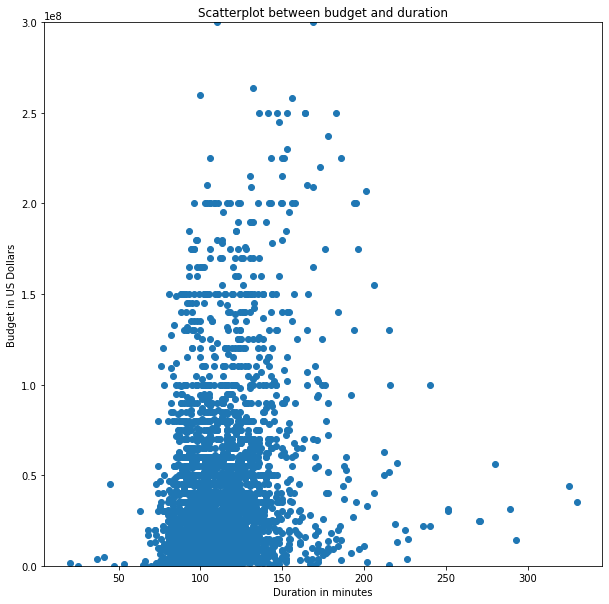

In [21]:
fig = plt.figure(1, figsize=(10,10))

y_budget = df_movies[['budget']]
x_duration = df_movies[['duration']]

axScatter = plt.subplot(111)
axScatter.scatter(x_duration, y_budget)
plt.ylim(0, 300000000)
axScatter.set_title('Scatterplot between budget and duration')
axScatter.set_xlabel('Duration in minutes')
axScatter.set_ylabel('Budget in US Dollars')

We can add another dataset to see the gender of every actor.
Both datasets come from the same source: The Movie Database. 
So we'll join them on the title.

In [22]:
df_credits = pd.read_csv('tmdb_5000_credits.csv')
df_credits = df_credits.rename(columns={'title': 'movie_title'})
df_credits

,movie_id,movie_title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [23]:
movie_with_cast = pd.merge(df_movies, df_credits, how="inner", on="movie_title")
movie_with_cast

,movie_imdb_link,movie_title,imdb_score,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,...,genre_History,genre_Family,genre_Musical,genre_Comedy,genre_Film-Noir,budget,gross,movie_id,cast,crew
0,tt0499549,Avatar,7.9,2009-01-01,James Cameron,0,CCH Pounder,1000,Joel David Moore,936,...,False,False,False,False,False,237000000.0,760505847.0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,tt0449088,Pirates of the Caribbean: At World's End,7.1,2007-01-01,Gore Verbinski,563,Johnny Depp,40000,Orlando Bloom,5000,...,False,False,False,False,False,300000000.0,309404152.0,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,tt2379713,Spectre,6.8,2015-01-01,Sam Mendes,0,Christoph Waltz,11000,Rory Kinnear,393,...,False,False,False,False,False,245000000.0,200074175.0,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,tt1345836,The Dark Knight Rises,8.5,2012-01-01,Christopher Nolan,22000,Tom Hardy,27000,Christian Bale,23000,...,False,False,False,False,False,250000000.0,448130642.0,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,tt0401729,John Carter,6.6,2012-01-01,Andrew Stanton,475,Daryl Sabara,640,Samantha Morton,632,...,False,False,False,False,False,263700000.0,73058679.0,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,tt0388838,Clean,6.9,2004-01-01,Olivier Assayas,107,Maggie Cheung,576,Béatrice Dalle,133,...,False,False,False,False,False,4500.0,136007.0,39851,"[{""cast_id"": 1, ""character"": ""Emily Wang"", ""cr...","[{""credit_id"": ""52fe47369251416c9106db9b"", ""de..."
4246,tt0255094,The Circle,7.5,2000-01-01,Jafar Panahi,397,Fereshteh Sadre Orafaiy,5,Nargess Mamizadeh,0,...,False,False,False,False,False,10000.0,673780.0,13898,"[{""cast_id"": 3, ""character"": ""Nargess"", ""credi...","[{""credit_id"": ""52fe45b09251416c7505f189"", ""de..."
4247,tt0390384,Primer,7.0,2004-01-01,Shane Carruth,291,Shane Carruth,291,David Sullivan,45,...,False,False,False,False,False,7000.0,424760.0,14337,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de..."
4248,tt0104815,El Mariachi,6.9,1992-01-01,Robert Rodriguez,0,Carlos Gallardo,121,Peter Marquardt,20,...,False,False,False,False,False,7000.0,2040920.0,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."


Cast is a nested field, this function will return the gender for the given cast and name.

In [24]:

def actor_to_gender(cast, name):
    cast = json.loads(cast)
    for actor in cast:
        if name == actor['name']:
            return actor['gender']
    return 0
 
movie_with_cast['actor_1_gender'] = movie_with_cast.apply(lambda movie: actor_to_gender(movie.cast, movie.actor_1_name), axis=1)
movie_with_cast['actor_2_gender'] = movie_with_cast.apply(lambda movie: actor_to_gender(movie.cast, movie.actor_2_name), axis=1)
movie_with_cast['actor_3_gender'] = movie_with_cast.apply(lambda movie: actor_to_gender(movie.cast, movie.actor_3_name), axis=1)


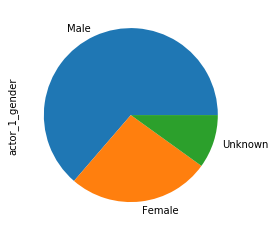

In [25]:
movie_with_cast.actor_1_gender.value_counts().plot(kind='pie', labels=['Male', 'Female', 'Unknown'])
plt.show();

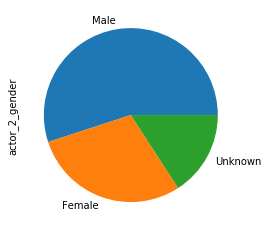

In [26]:
movie_with_cast.actor_2_gender.value_counts().plot(kind='pie', labels=['Male', 'Female', 'Unknown'])
plt.show();

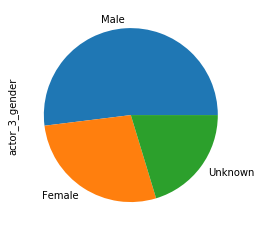

In [27]:
movie_with_cast.actor_3_gender.value_counts().plot(kind='pie', labels=['Male', 'Female', 'Unknown'])
plt.show();

The gender ratio is for the majority the same among the first three featured actors.

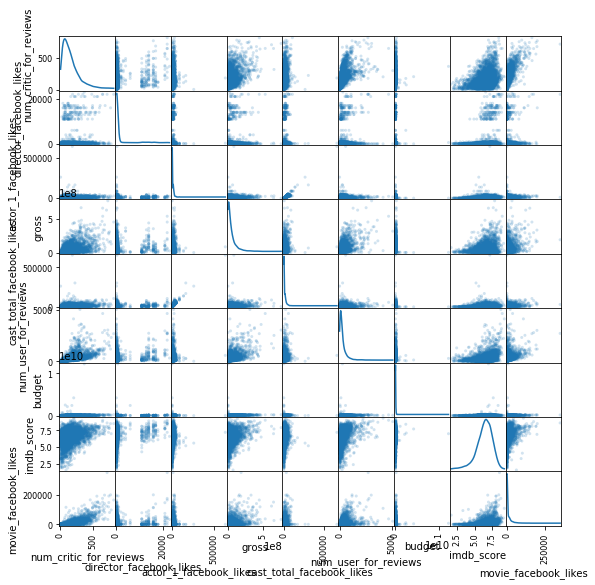

In [28]:
from pandas.plotting import scatter_matrix
plt_scatter = scatter_matrix(df_movies[['num_critic_for_reviews', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes', 'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes']], alpha=0.2, figsize=(9,9), diagonal='kde').view()
plt.show()